<a href="https://colab.research.google.com/github/labhi-26/analysis-1-demo-/blob/main/analysis_1_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!git clone https://github.com/labhi-26/analysis-1.git

Cloning into 'analysis-1'...


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
sales = pd.read_csv("/content/drive/MyDrive/sales_data.csv")

In [51]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [52]:
sales['Customer_Age'].mean()

35.91921157861212

<Axes: >

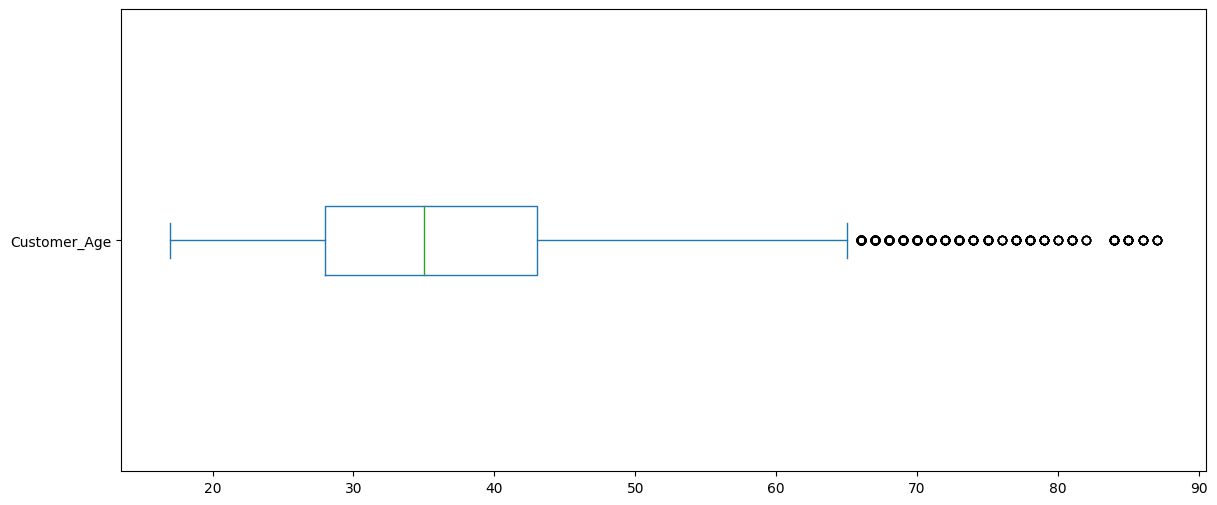

In [53]:
sales["Customer_Age"].plot(kind='box', vert=False, figsize=(14,6))

In [54]:
sales["Order_Quantity"].mean()

11.901659648253654

<Axes: ylabel='Frequency'>

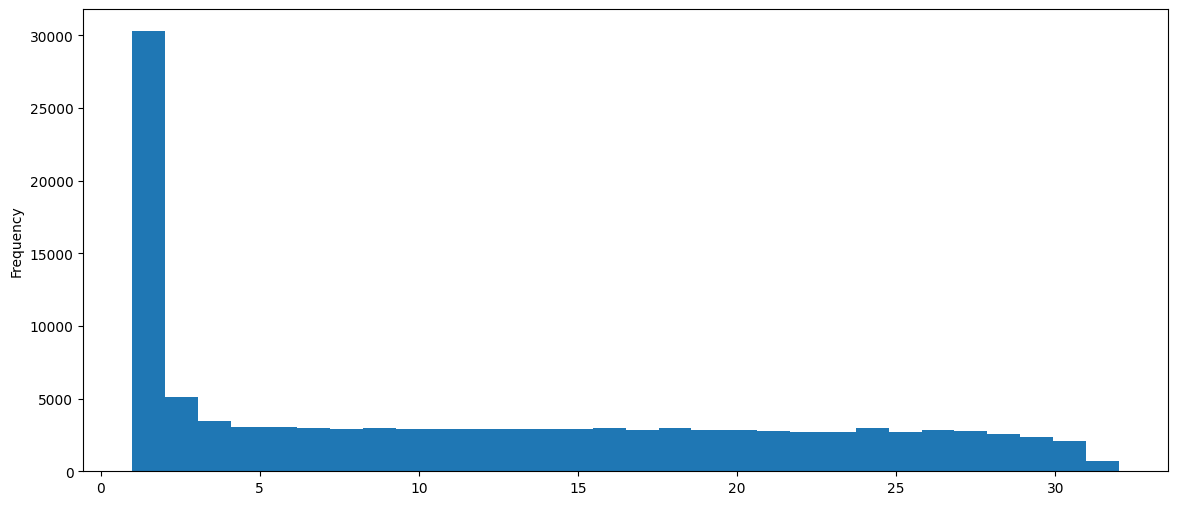

In [55]:
sales["Order_Quantity"].plot(kind='hist', bins=30, figsize=(14,6))

<Axes: >

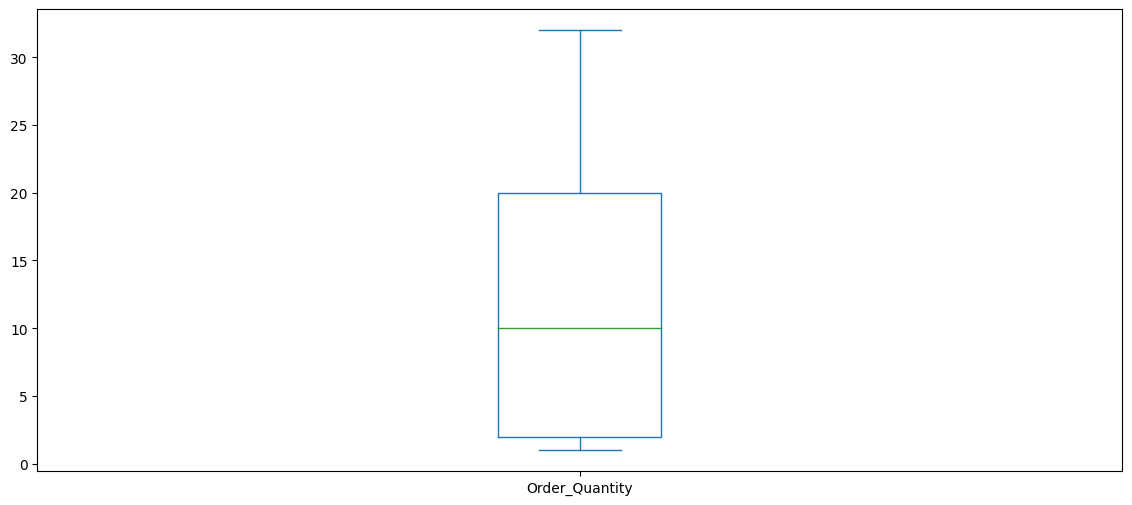

In [56]:
sales['Order_Quantity'].plot(kind='box', vert=True, figsize=(14,6))

In [57]:
sales['Year'].value_counts()          #How many sales per year do we have?

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<Axes: ylabel='Year'>

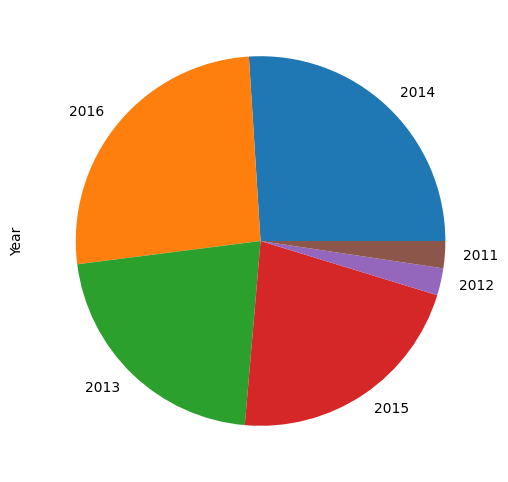

In [58]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: >

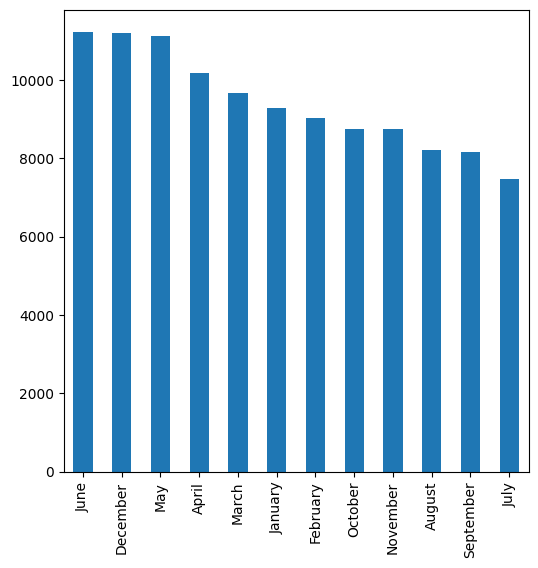

In [59]:
sales['Month'].value_counts().plot(kind='bar', figsize=(6,6))

In [60]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

<Axes: >

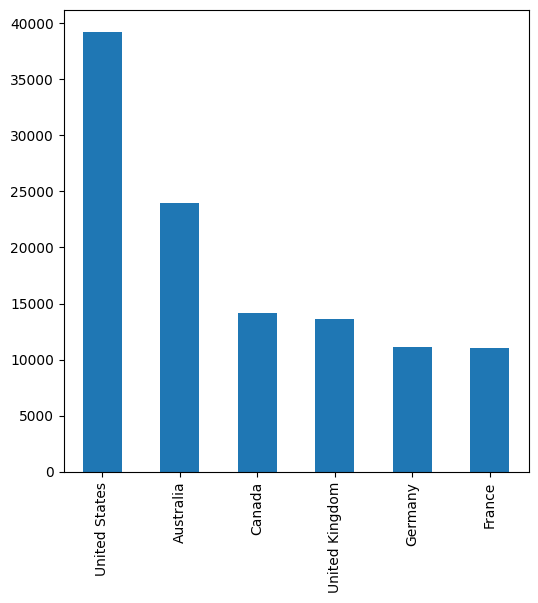

In [61]:
sales['Country'].value_counts().plot(kind='bar', figsize=(6,6))

In [62]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [63]:
sales['Product'].value_counts().head(10)

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
Road Tire Tube              4176
Sport-100 Helmet, Black     4152
Fender Set - Mountain       4032
Sport-100 Helmet, Blue      3788
Touring Tire Tube           3702
Name: Product, dtype: int64

<Axes: >

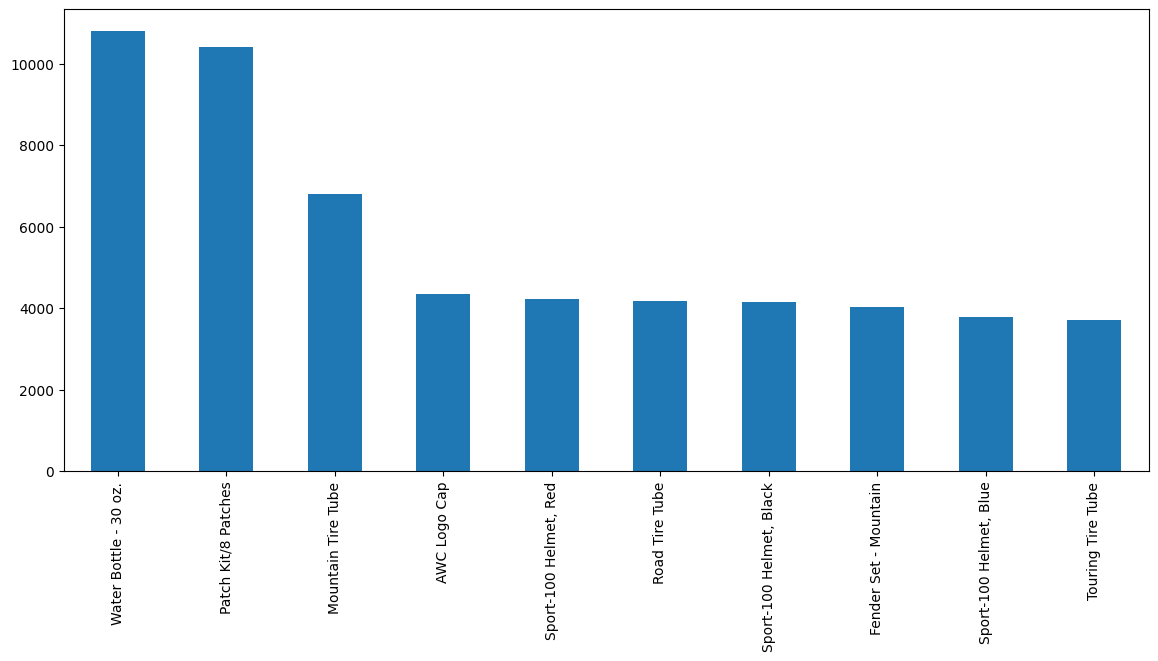

In [64]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

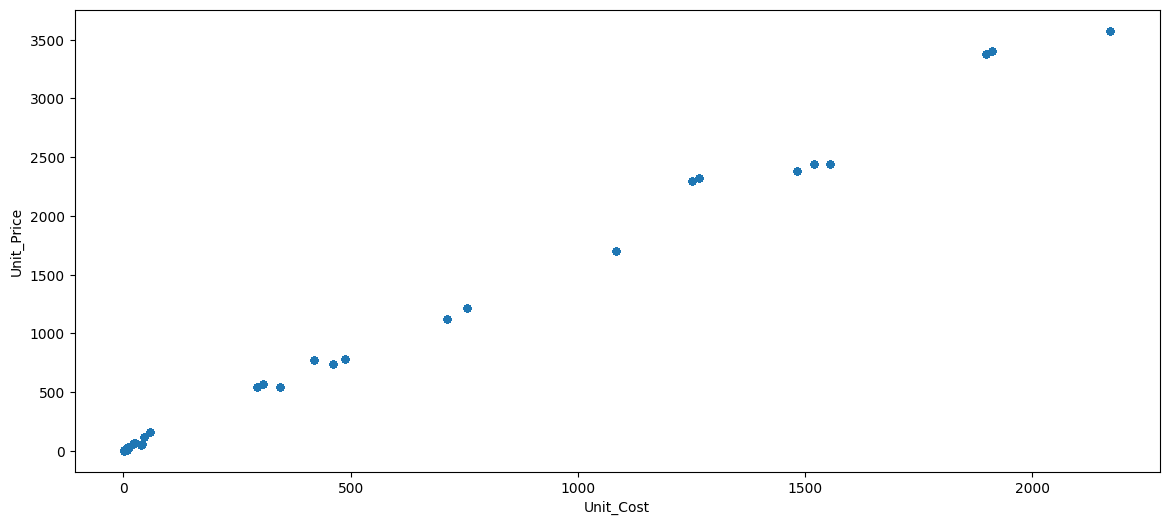

In [65]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(14,6))    #Can you see any relationship between Unit_Cost and Unit_Price?

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

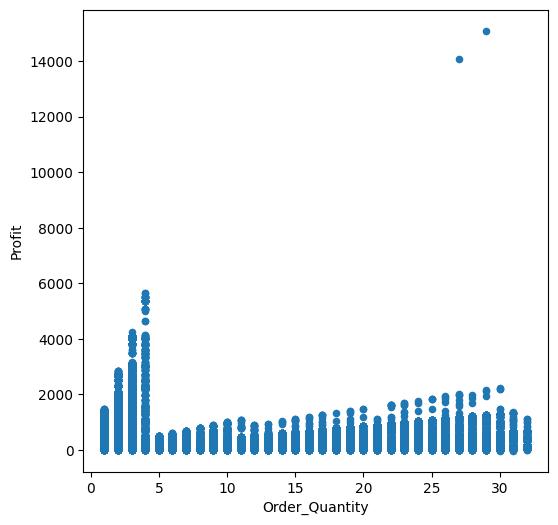

In [66]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

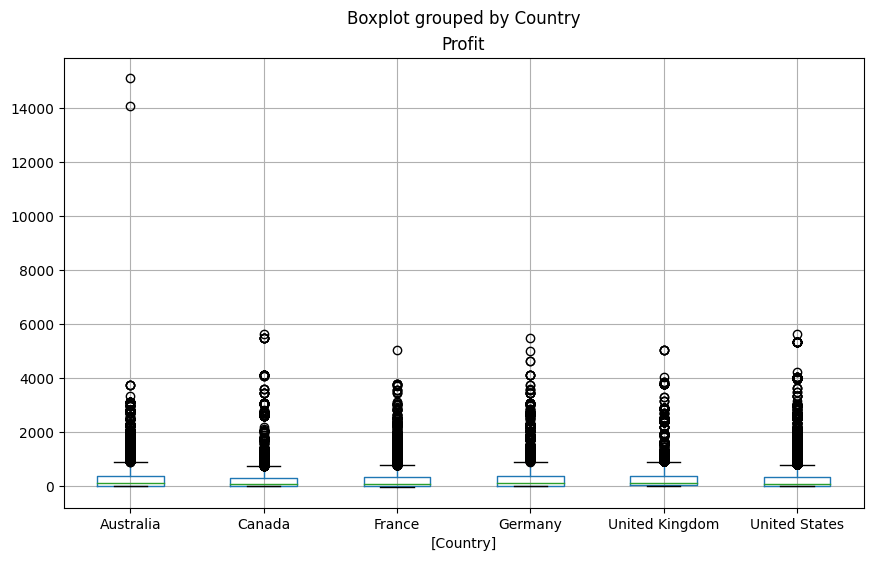

In [67]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

In [68]:
sales['Calculated_Date'] = sales[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [69]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

<Axes: >

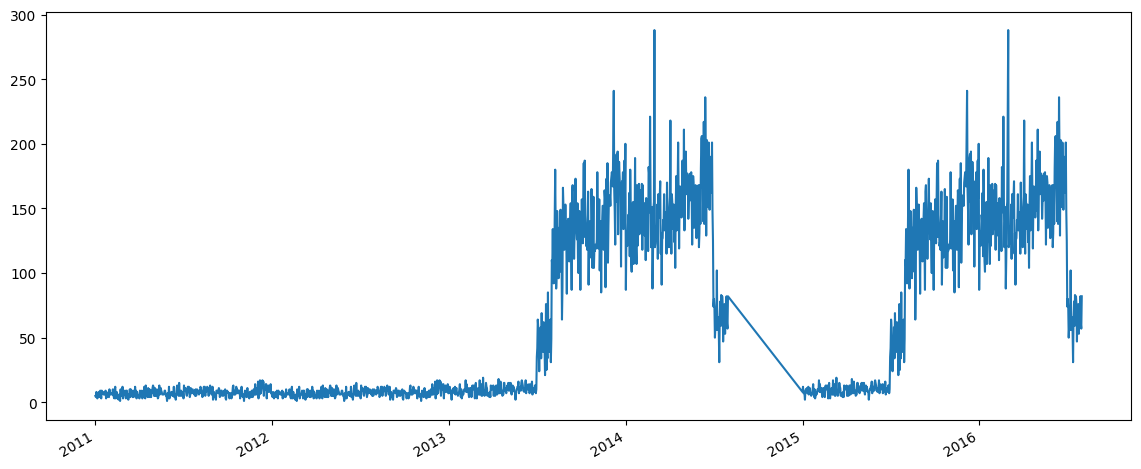

In [70]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

In [71]:
sales['Revenue'] += 50

In [72]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

In [73]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike_Racks')].shape[0]

0

In [74]:
#labels stands for the indexes i.e 0 1 2 3 in columns

# .loc specifies what row and what columns [row, columns]

In [75]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()       # row = france and column =state

In [76]:
france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<Axes: >

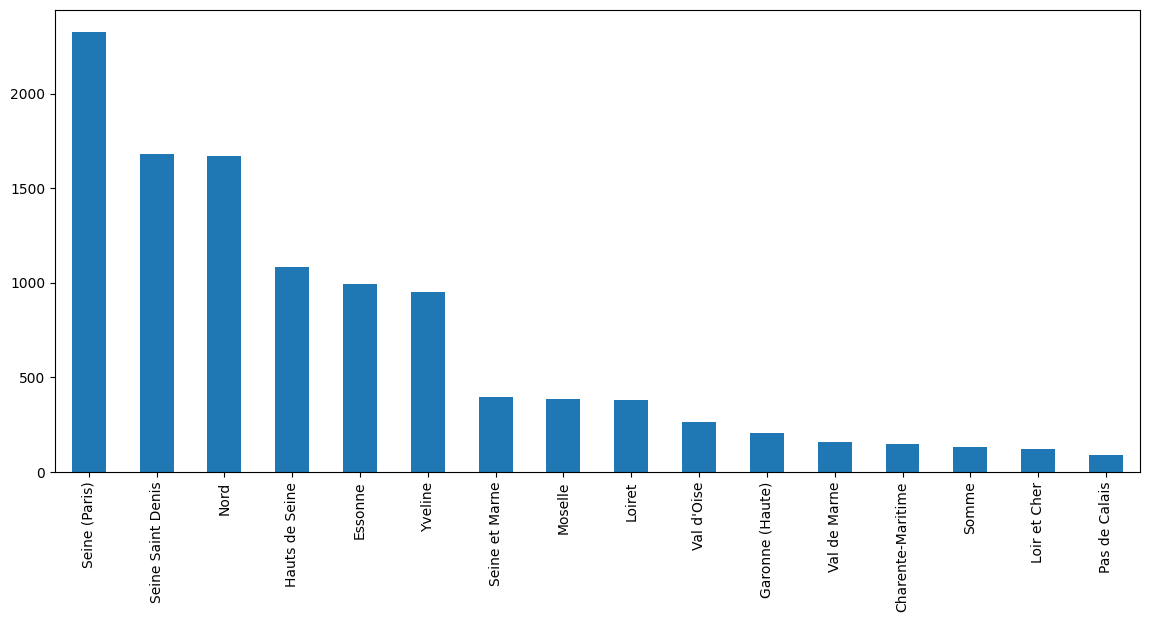

In [77]:
france_states.plot(kind='bar', figsize=(14,6))

In [78]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<Axes: ylabel='Product_Category'>

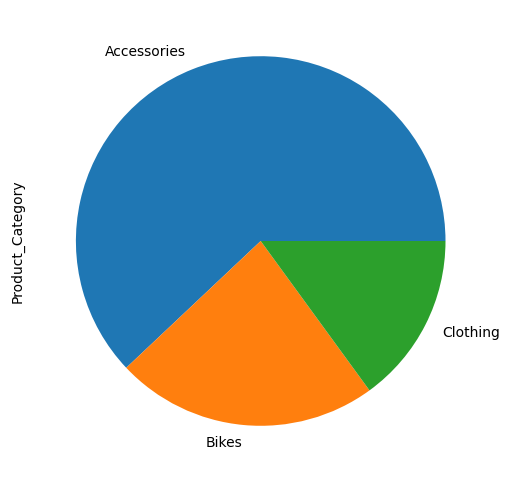

In [79]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

In [80]:
Accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()   #per Accessories sub category

In [81]:
Accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<Axes: >

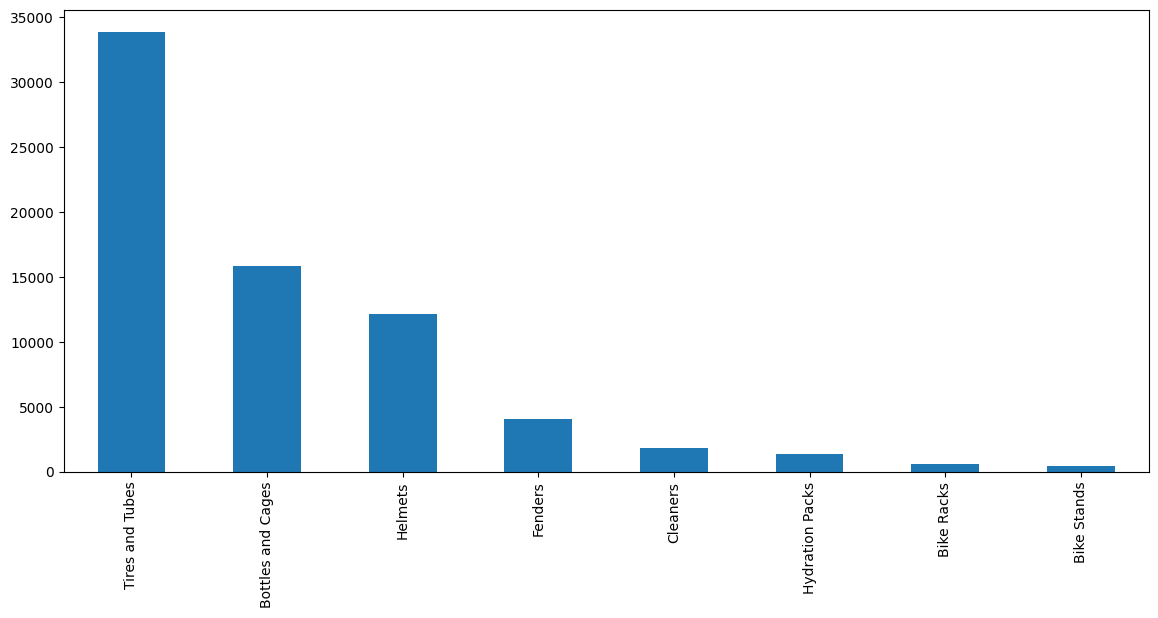

In [82]:
Accessories.plot(kind='bar', figsize=(14,6))

In [83]:
Bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
Bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<Axes: ylabel='Sub_Category'>

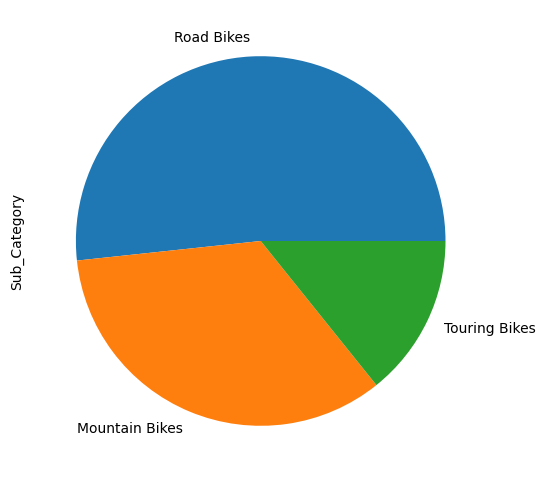

In [84]:
Bikes.plot(kind='pie', figsize=(6,6))

In [85]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<Axes: >

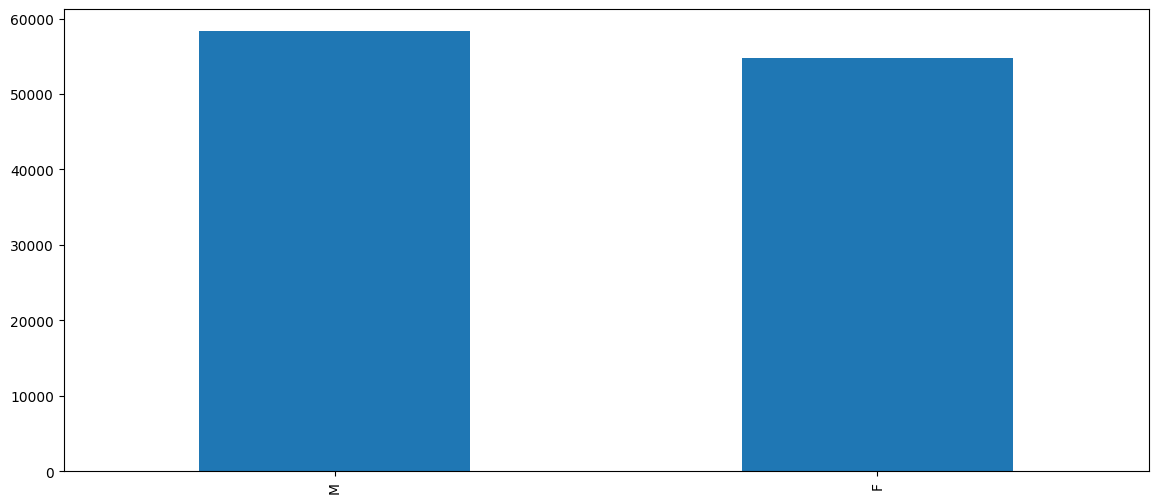

In [86]:
sales['Customer_Gender'].value_counts().plot(kind='bar', figsize=(14,6))     #checking which gender has the highest sales

In [87]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

50

In [88]:
sales.sort_values(['Revenue'], ascending=False).head(5)      #top-5 sales with the highest revenue

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


In [89]:
cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


In [90]:
cond = sales['Revenue'] > 10_000
sales.loc[cond,'Order_Quantity'].mean()

3.689265536723164

In [91]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')
sales.loc[cond].shape[0]

5015

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

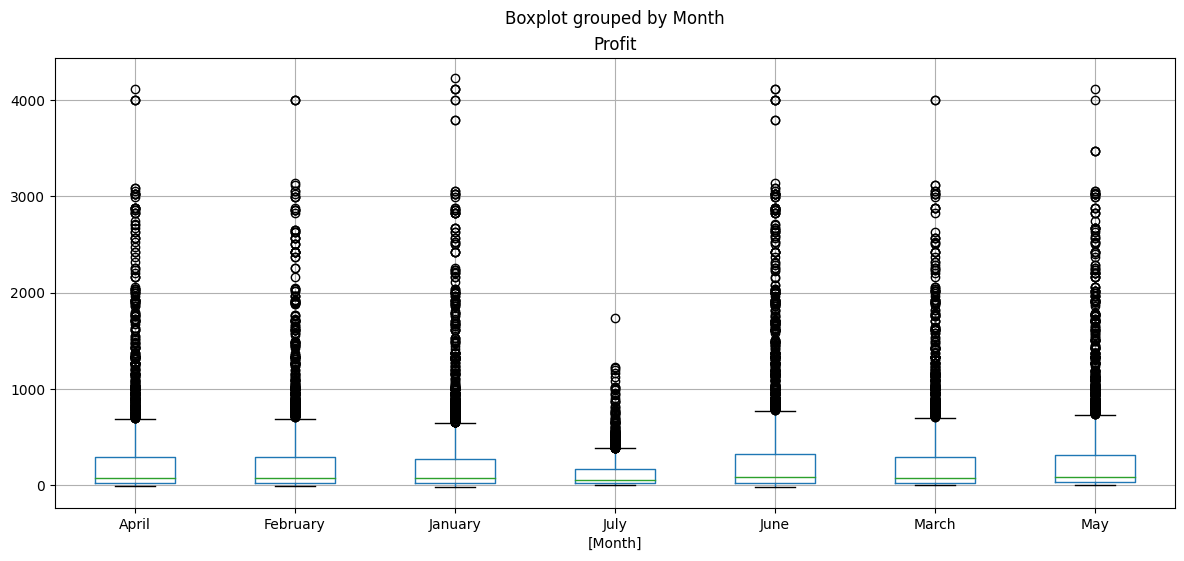

In [92]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', figsize=(14,6))

In [93]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072